# Lab 2 Evaluation

In [5]:
# Import some useful libraries and functions
import numpy as np
import pandas
def print_stats(dataset):
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())

In [6]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'
import os.path
import requests
if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/tp2/' + filename)
    open(filename , 'wb').write(r.content)
print('Dataset available')

Dataset available


### Explore the dataset

- How many examples are there in the dataset?
  <span style="color:blue">There are 308 examples in the dataset (308 rows)</span>
- How many features for each example?
  <span style="color:blue">There are 6 features (7 columns), the right-most column being the result of each example</span>
- What is the ground truth of the 10th example?
  <span style="color:blue">The ground truth of this example is 1.83</span>

In [7]:
# loads the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1] # examples features
Y = dataset[:, -1]  # ground truth

# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")

f([-5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([-5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([-2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([-5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([0.    0.53  4.78  3.75  3.15  0.175]) = 0.59


The following command adds a column to the inputs.

- What is in the value added this column? <span style="color:blue">The column added only contains ones.</span>
- Why are we doing this? <span style="color:blue">This value represents the "w0" in the formula of the affine function: y = w0 + x1w1 +x2w2 + ... + xnwn. This value needs to be initialized and will be changed afterwards (with the evolution of the algorithm). It avoids having only linear functions, as we want affine functions.</span>

In [9]:
X = np.insert(X, 0, np.ones((len(X))), axis= 1)
#print_stats(X)

## Creating the perceptron

We now want to define a perceptron, that is, a function of the form: 

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

- Complete the code snippet below to:
  - create the vector of weight `w`
  - implement the `h` function that evaluate an example based on the vector of weights
  - check if this works on a few examples

In [10]:
w = np.zeros(7)

def h(w, x):
    sum = 0
    for i in range(0,len(x)-1):
        sum+=x[i]*w[i]
    return sum
X = dataset[:, :-1] # examples features
Y = dataset[:, -1]  # ground truth

# print the ground truth and the evaluation of h_w on the first example
print("--First example-- \nground truth:", Y[0], "\nevaluation of h_w:", h(w, X[0]))

--First example-- 
ground truth: 8.62 
evaluation of h_w: 0.0


## Loss function

Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.

In [11]:
def loss(w, x, y):
    return (y-h(w,x))**2 #L2(a,b)=(a-b)^2

## Empirical loss

Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.

In [12]:
def emp_loss(w, X, Y):
    sum=0
    for i in range(len(X)):
        sum+=(loss(w,X[i],Y[i]))
    return sum/len(X)

## Gradient update

A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

In [13]:
def compute_update(w, X, Y, alpha):
    dw = np.zeros(len(w))
    for i in range(0,len(w)-1):
        sum=0
        for j in range(0,len(X)-1):
            sum+=(Y[j]-h(w,X[j]))*X[j][i]
        dw[i]=sum*alpha
    return dw
   
compute_update(w, X, Y, alpha = 10e-7)

array([-0.00754539,  0.00181636,  0.01543604,  0.01266542,  0.01033756,
        0.00130721,  0.        ])

## Gradient descent

Now implement the gradient descent algorithm that will:
- repeatedly apply an update the weights 
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights

In [14]:
def descent(w_init, X, Y, alpha, max_iter):
    w=np.copy(w_init)
    for i in range(max_iter):
        for j in range (len(w)):
            w[j]=w[j]+compute_update(w, X, Y, alpha)[j]
    return w

## Exploitation

You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?<span style="color:blue"> Yes, we can see on the graph below that the loss converged. </span>

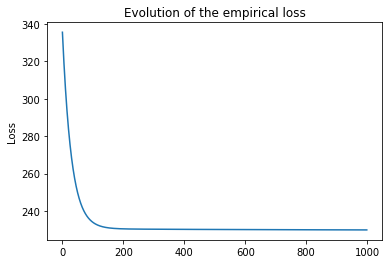

array([-0.18285906,  0.11883795,  1.00261101,  0.74904522,  0.67785455,
        0.4424448 ,  0.        ])

In [30]:
from matplotlib import pyplot as plt
import statistics

#Same function as descent function but prints the empiral loss for each iteration
def descent_printing_loss(w_init, X, Y, alpha, max_iter):
    l=[]
    w=np.copy(w_init)
    for i in range(max_iter):
        for j in range (len(w)):
            w[j]=w[j]+compute_update(w, X, Y, alpha)[j]
        l.append(emp_loss(w,X,Y))
    plt.title("Evolution of the empirical loss")
    plt.plot(l)
    plt.ylabel('Loss')
    plt.show()
    return w 

w_init = np.zeros(7)
descent_printing_loss(w_init, X, Y, 10e-7, 1000)

- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice? <span style="color:blue"> As we can see on the graphs below, increasing the number of max_iter enables to obtain a better result, but it is time consuming. We decided that max_iter = 100 is a reasonable choice to have a precise model but that does not need too much time to execute.  </span>

In [30]:
#Function that constructs plots based on a parameter and the impact of that parameter on weights
from matplotlib import pyplot as plt
import statistics
def construct_plt(X,Y,parameter,x_axis):
    w_init = np.zeros(7)
    weights=[]
    if x_axis=='alpha':
        for i in parameter:
            weights.append(statistics.mean(descent(w_init,X,Y,i,10)))
    else:
        for i in parameter:
            weights.append(statistics.mean(descent(w_init,X,Y,10e-7,i)))
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(parameter,weights)
    plt.xlabel(x_axis)
    plt.ylabel("Weights")
    plt.title("Impact of "+x_axis+" on the weights")
    plt.show()


In [31]:
def data_analysis(X,Y):
    #Impact of alpha on the weights (the Y axis represents an average on the values in w)
    alphas=[10,10e-3,10e-5,10e-7,10e-9]
    construct_plt(X,Y,alphas,'alpha')

    #Impact of max_iter on the weights (the Y axis represents an average on the values in w)
    max_iters=[1,10,100]
    construct_plt(X,Y,max_iters,'max_iter')

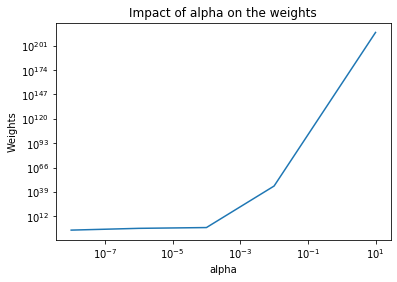

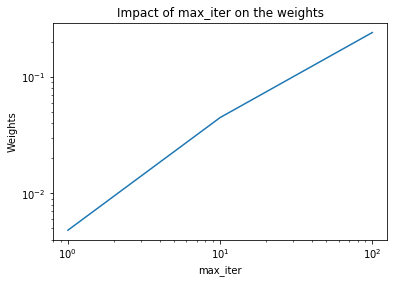

Wall time: 5.59 s


In [32]:
%%time
data_analysis(X,Y)

- What is the loss associated with the final model? <span style="color:blue"> The loss associated with our final model is 230. </span>
- Is the final model the optimal one for a perceptron? <span style="color:blue"> This final model is not optimal as the loss associated with it is not 0. It means that not all our predictions are accurate; our model is not perfect. </span>

Loss associated:  229.39723048470043


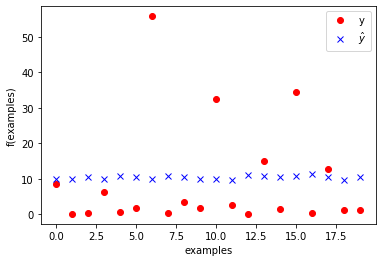

In [55]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction
import matplotlib.pyplot as plt

num_samples_to_plot = 20

w_init = np.zeros(7)
w_init = descent(w_init, X, Y, 10e-5, 100)
yw = [h(w_init,x) for x in X]

plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')

plt.legend()
plt.xlabel("examples")
plt.ylabel("f(examples)")

print("Loss associated: ", emp_loss(w_init, X, Y))





# Going further

The following are extensions of the work previously done. If attempting them **do not modify** the code you produced above so that it can be evaluated.

### Improvements to gradient descent

Consider improving the gradient descent with:

 - Stochastic Gradient Descent (SGD), which means selecting a subset of the examples for training
 - Detection of convergence to halt the algorithm before the maximum number of iterations


<span style="color:blue">The Stochastic Gradient Descent algorithm is an improvement over the basic Gradient Descent algorithm in terms of computation time. Indeed, by selecting only a subset of the examples studied, the calculations could be significantly reduced. The subset is selected randomly so it is supposed to represent the dataset well.<br>
***Note: Stochastic means Random***
<br><br>
<span style="color:blue">There are two simple ways to proceed. Either we select random points of the dataset every time we calculate the descent (each time the w vector is updated) with less iterations than the original algorithm, or we could make a smaller randomized copy of the dataset and work with that instead. The second solution being the simplet, that's how we're going to proceed

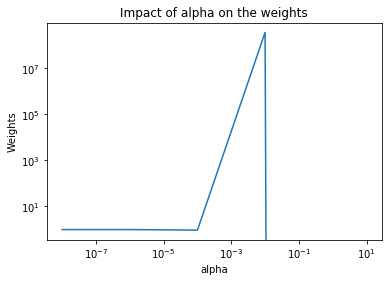

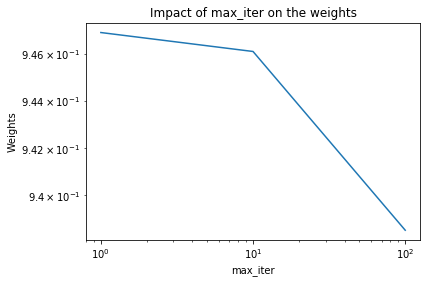

Wall time: 2.64 s


In [48]:
%%time

#We have 308 examples in X. Let's make it 25 random examples
import random
alphas=[10,10e-3,10e-5,10e-7,10e-9]
max_iters=[1,10,100]
X = dataset[:, :-1] # examples features
Y = dataset[:, -1]  # ground truth
randX=[]
randY=[]

for i in range (0,25):
    rand=random.choice(dataset)
    randX.append(rand[:-1])
    randY.append(rand[-1])
#Analysis
data_analysis(randX,randY)


<span style="color:blue">The plots seem to be fairly similar. Also, we can see that we went from an execution time of 29.1 s to 3.56 s </span>

### Data normalization

Different input features can have different units, and very different ranges.
Within the perceptron computation, these values will be summed together.
While gradient descent is normally able to deal with this (by adapting the weights of the perceptron for each input feature), standardizing the input features usually eases the perceptron training, and can sometimes improve accuracy.




```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
```

Try applying a standard normalization to the input features (make sure that you keep a feature column that is always equal to 1). Is the convergence faster ? Try to quantify this speed-up. What about accuracy ?

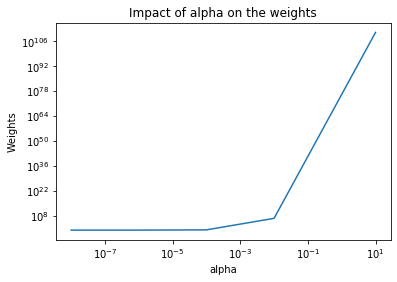

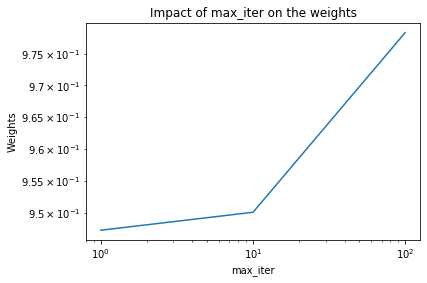

Wall time: 22.4 s


In [49]:
%%time

from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
#Analysis
data_analysis(X_normalized,Y)

<span style="color:blue">By comparing the execution time of the two cells, the Data Normalization on X seems to have no impact on the speed on the convergence</span>